# Time Series Part 2
This week's material provides a brief introduction into three machine learning algorithms. This work assumes that the reader is familiar with concepts in statistical theory and Scikit Learn.

- Step 0) Load Libraries
- Step 1) Relevant Functions
- Step 2) Load Data
- Step 3) Curate Data

In [1]:
##-------------------------------------
## Step 0) Load Libraries
##-------------------------------------
##------------------------------------------------
## ~~ Manipulation
## Array Manipulation
import numpy as np                       
## Data Frame Manipulation
import pandas as pd 
## Change Directory in Python
import os                              
##------------------------------------------------
##------------------------------------------------
## ~~ Visualization
## Plot
#from matplotlib.pylab as plt  
from matplotlib.pyplot import *        
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
##------------------------------------------------
##------------------------------------------------
## ~~ Date Manipulation
from datetime import datetime
##------------------------------------------------
##------------------------------------------------
## ~~ Date Manipulation
from datetime import datetime
##------------------------------------------------
##------------------------------------------------
## ~~ Statistical Models
from statsmodels.tsa.stattools import adfuller
##------------------------------------------------
##------------------------------------------------
## ~~ Miscellaneous
## Generate randdom numbers
import random
##------------------------------------------------

In [5]:
##-------------------------------------
## Step 1)  Relevant Functions
##-------------------------------------
def new_weight_calculate(x_after, x_before,window_number,after_percent):
    """
    Function Name: new_weight_calculate
    Input: future list, past list, windom size, future percent
    Output: new weight
    Purpose: calculate new weight based on the future, the past and a random effect
    """
    
    ## Determine the percent that the before weight will impact new value
    before_percent = 1 - after_percent
    
    ## Remove 'nan' from list
    x_after_no_nan = [x for x in x_after  if  str(x) != 'nan']
    x_before_no_nan = [x for x in x_before  if  str(x) != 'nan']

    ## Create Appropriate window**
    x_after_na_window = x_after_no_nan[:window_number]
    x_before_na_window = x_before_no_nan[-window_number:]

    ## Calculate before effect
    before_effect = before_percent*np.mean(x_before_na_window)

    ## Calculate after effect
    after_effect = after_percent*np.mean(x_after_na_window)

    ## Calculate Random effect
    random_effect = random.uniform(-0.5, 0.5)
    
    ## Determine the new weight based on after, before and random
    new_weight = after_effect + before_effect + random_effect
    return(new_weight)

def impute_missing(x,window_number,after_percent):
    """
    Function Name: impute_missing
    Input: list, size of window, percent of future
    Output: list with imputed values
    Purpose: Ability to impute based on future and past values
    """
    ## Turn series into list
    x = x.tolist()
    ## Loop over entire list to modify NANs
    for i in range(len(x)):
        ## Determine if value is nan
        if np.isnan(x[i]) == True:
            ## Look before nan value
            x_before = x[:i]
            ## Look after nan value
            x_after = x[(i+1):]
            ## Use before and after nan value to determine 
            x[i] = new_weight_calculate(x_after,
                                        x_before,
                                        window_number,
                                        after_percent)
    return(x)



In [7]:
##-------------------------------------
## Step 2) Load Data
##-------------------------------------
default_path = 'C:/Users/james/OneDrive/Documents/Important_Files/Fitness Analysis'
os.chdir(default_path)
weight = pd.read_csv('weight_eman.csv',parse_dates=['Date'])


# Monday
## Imputation

In [8]:
##-------------------------------------
## Step 2) Preliminary Curation of Data
##-------------------------------------
## Change Timestamp into datetime
weight['Date'] = pd.to_datetime(weight['Date'], 
                                infer_datetime_format=True)
## Turn 'Date' into index
weight = weight.set_index(['Date'])


## Impute Missing weight Values
weight['Weight_Imputed'] = impute_missing(weight['Weight'],10,0.75)

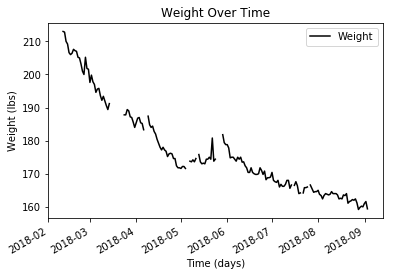

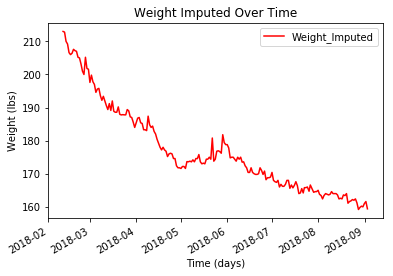

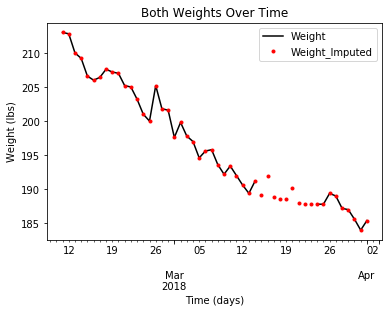

In [9]:
##-------------------------------------
## Step _) 
##-------------------------------------
ax1 =  weight.plot(y='Weight',
                   title = 'Weight Over Time',
                   color='k')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('just_weight.png')

ax2 =  weight.plot(y='Weight_Imputed',
                   title = 'Weight Imputed Over Time',
                   color='red')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Weight (lbs)')
savefig('imputed_weight.png')

ax3 =  weight.iloc[:50].plot(title = 'Both Weights Over Time',
                  style=['k','r.'])
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Weight (lbs)')
savefig('both_weights.png')

## Stationary

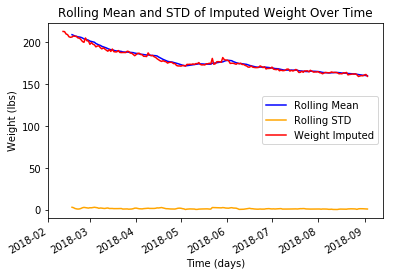

In [10]:
##-------------------------------------
## Step _) 
##-------------------------------------
weight['Weight_Imputed_rm'] = weight['Weight_Imputed'].rolling(window=7).mean()
weight['Weight_Imputed_rs'] = weight['Weight_Imputed'].rolling(window=7).std()
ax4 = weight.plot(y='Weight_Imputed_rm',
                   title = 'Rolling Mean and STD of Imputed Weight Over Time',
                   color='blue')
ax4 = weight.plot(y='Weight_Imputed_rs',
                   color='orange',ax=ax4)
ax4 = weight.plot(y='Weight_Imputed',
                   color='red',ax=ax4)
ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Weight (lbs)')
ax4.legend(["Rolling Mean", "Rolling STD","Weight Imputed"])
savefig('imputed_weight_rm_rs_im.png')

# Wednesday    
## Hypothesis Test for Stationary
1. Dickey Fuller test Hypothesis testing for stationary processes
    - Null Hypothesis: Stationary
    - Alternative Hypothesis: Not Stationary
    - The Hypothesis Test Shows that it is stationary


2. Other ways to View Data
    - Log of weight and moving average
    - Remove Moving Average

In [16]:
##-------------------------------------
## Step _) Implement Dicky-Fuller Hypothesis Test
##          Null Hypothesis:
##          Alternative Hypothesis:
##-------------------------------------
dftest = adfuller(weight['Weight_Imputed'], autolag = 'AIC')
index_names = ['Test Statistic', 'p-value', '# Lags Used', '# of Observations Used']

dfoutput = pd.Series(dftest[0:4],index = index_names)
for key, value in dftest[4].items():
    dfoutput['Critical vslue (%s)'%key] = value
    
print(dfoutput)

Test Statistic             -3.100273
p-value                     0.026533
# Lags Used                 7.000000
# of Observations Used    197.000000
Critical vslue (1%)        -3.463987
Critical vslue (5%)        -2.876326
Critical vslue (10%)       -2.574652
dtype: float64


## Other ways to View Data
Log
Moving Average


### 1) Log of the quantity
Do not have to do the log, but the log provides insight

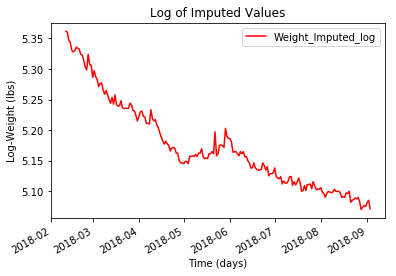

In [20]:
##-------------------------------------
## Step _) 
##-------------------------------------
weight['Weight_Imputed_log'] = np.log(weight['Weight_Imputed'])
ax5 = weight.plot(y='Weight_Imputed_log',
                   title = 'Log of Imputed Values',
                   color='red')
ax5.set_xlabel('Time (days)')
ax5.set_ylabel('Log-Weight (lbs)')

savefig('imputed_weight_log.png')

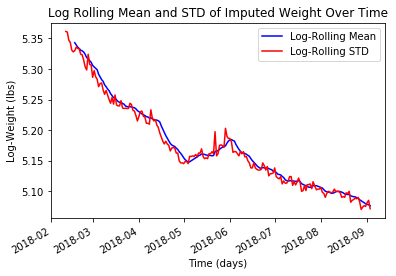

In [23]:
##-------------------------------------
## Step _) 
##-------------------------------------
weight['Weight_Imputed_log_rm'] = weight['Weight_Imputed_log'].rolling(window=7).mean()
weight['Weight_Imputed_log_rs'] = weight['Weight_Imputed_log'].rolling(window=7).std()
ax6 = weight.plot(y='Weight_Imputed_log_rm',
                   title = 'Log Rolling Mean and STD of Imputed Weight Over Time',
                   color='blue')
# ax6 = weight.plot(y='Weight_Imputed_log_rs',
#                    color='orange',ax=ax6)
ax6 = weight.plot(y='Weight_Imputed_log',
                   color='red',ax=ax6)
ax6.set_xlabel('Time (days)')
ax6.set_ylabel('Log-Weight (lbs)')
ax6.legend(["Log-Rolling Mean", "Log-Rolling STD","Log-Weight Imputed"])
savefig('imputed_weight_rm_rs_im.png')

### 2) Remove Moving Average

Text(0,0.5,'Weight (lbs)')

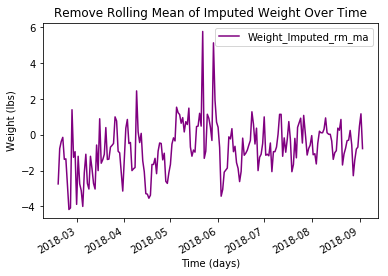

In [25]:
##-------------------------------------
## Step _) 
##-------------------------------------
## Remove moving Average
movingaverage = weight['Weight_Imputed'].rolling(window=7).mean()
weight['Weight_Imputed_rm_ma'] = weight['Weight_Imputed'] - movingaverage

ax7 = weight.plot(y='Weight_Imputed_rm_ma',
                   title = 'Remove Rolling Mean of Imputed Weight Over Time',
                   color='purple')

ax7.set_xlabel('Time (days)')
ax7.set_ylabel('Weight (lbs)')


## Friday Code Outline
Use the following methods on imputed data:
- Linear
- Quadratic
- Exponential

## Plot point types
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html